## EDA OF Uber Fare Amount

#### Importing the Dataset

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [386]:
df = pd.read_csv("../data/uber.csv", parse_dates=['pickup_datetime'])
df.drop(['Unnamed: 0','key'], axis=1, inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [387]:
print(f'Inference: The Dataset consists of {df.shape[1]} features & {df.shape[0]} samples.')

Inference: The Dataset consists of 7 features & 200000 samples.


### Handling Missing Values

In [388]:
nullValues = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nullValues['Percentage'] = round(nullValues['Total Null Values']/df.shape[0],3)*100
print(nullValues)

                   Total Null Values  Percentage
fare_amount                        0         0.0
pickup_datetime                    0         0.0
pickup_longitude                   0         0.0
pickup_latitude                    0         0.0
passenger_count                    0         0.0
dropoff_longitude                  1         0.0
dropoff_latitude                   1         0.0


In [389]:
df[df['dropoff_longitude'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,24.1,2013-07-02 03:51:57+00:00,-73.950581,40.779692,NaN,NaN,0


In [390]:
df.dropna(inplace=True)

In [391]:
df.isnull().sum()# after clean dataset

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [392]:
df.duplicated().sum()#checking duplicate values

0

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [394]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


#### Observations

- Longitude and latitude values must be between -90 to 90. Some rows have inconsistent values
- Minimum fare amount is negative. May be an error.
- Maximum fare is significantly high. It needs to be analyzed.
- The minimum passenger count is 0 and max is 208. Both the values seem inconsistent.

In [395]:
df_delete = df[(df['pickup_latitude']>180) | (df['pickup_latitude']<-180)|
                    (df['dropoff_latitude']>180) | (df['dropoff_latitude']< -180)|
                    (df['pickup_longitude']>90) | (df['pickup_longitude']<-90) |
                    (df['dropoff_longitude']>90) | (df['dropoff_longitude']<-90)]
df_delete.shape

(13, 7)

In [396]:
index_to_delete = df_delete.index
index_to_delete

Index([  4949,  32549,  40908,  48506,  56617,  61793,  75851,  91422, 103745,
       139447, 144253, 161652, 199936],
      dtype='int64')

Since only 13 rows out of 200000 records have inconsistent values in latitude and longitude columns, we can drop these rows.

In [397]:
before = df.shape
df.drop(index_to_delete,inplace=True)
print(f'before :{before[0]},after :{df.shape[0]}')

before :199999,after :199986


In [398]:
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

In [399]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17


In [400]:
df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})

df['Hourly_Segments'] = df.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

In [401]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,Monthly_Quarter,Hourly_Segments
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Q2,H5
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Q3,H6
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Q3,H6
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Q2,H3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Q3,H5


In [402]:
df.drop(['pickup_datetime','month', 'hour',], axis=1, inplace=True)

In [403]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,H3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,H5


#### Problem can be solved using Haversine formula
👉🏻 [reference from GeekForGeeks](https://www.geeksforgeeks.org/program-distance-two-points-earth/)

```
Find the value of the latitude in radians:
Value of Latitude in Radians, lat = Latitude / (180/pi) OR
Value of Latitude in Radians, lat = Latitude / 57.29577951
Find the value of longitude in radians:
Value of Longitude in Radians, long = Longitude / (180/pi) OR
Value of Longitude in Radians, long = Longitude / 57.29577951
```

Distance, d = 3963.0 * arccos[(sin(lat1) * sin(lat2)) + cos(lat1) * cos(lat2) * cos(long2 – long1)]

In [404]:
from math import radians, sin, cos, sqrt, asin

def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [405]:
df['distance_travelled']=distance_transform(df['pickup_longitude'].to_numpy(),
                                  df['pickup_latitude'].to_numpy(),
                                  df['dropoff_longitude'].to_numpy(),
                                  df['dropoff_latitude'].to_numpy())

df['distance_travelled'] = df['distance_travelled'].round(3)
## This Distance is in kilometers


In [406]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,distance_travelled
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5,1.683
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6,2.458
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6,5.036
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,H3,1.662
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,H5,4.475


In [407]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,distance_travelled
count,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000,199986.000000
mean,11.359865,-72.501679,39.917919,-72.511699,39.922055,1.684548,2011.742477,3.048383,20.542992
std,9.901890,10.449873,6.130422,10.412139,6.117675,1.386002,1.856432,1.946965,379.542503
min,-52.000000,-89.933333,-74.015515,-75.458979,-74.015750,0.000000,2009.000000,0.000000,0.000000
25%,6.000000,-73.992064,40.734793,-73.991407,40.733824,1.000000,2010.000000,1.000000,1.215000
50%,8.500000,-73.981822,40.752592,-73.980092,40.753042,1.000000,2012.000000,3.000000,2.121000
75%,12.500000,-73.967154,40.767157,-73.963658,40.768001,2.000000,2013.000000,5.000000,3.875000
max,499.000000,40.808425,48.018760,40.831932,45.031598,208.000000,2015.000000,6.000000,8782.899000


In [408]:
df[df['fare_amount']<= 0].shape

(22, 11)

In [409]:
import seaborn as sns

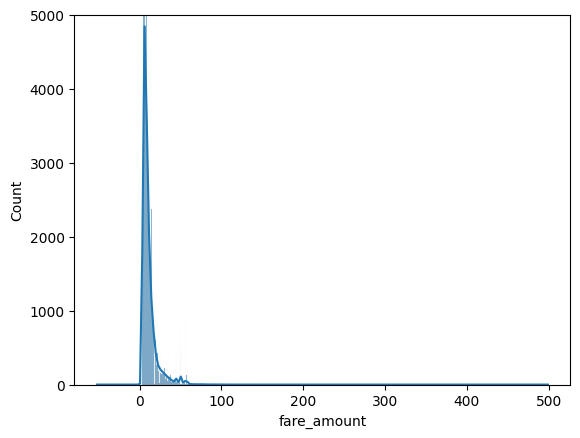

In [410]:
sns.histplot(df['fare_amount'],kde=True)
plt.ylim(0,5000);

In [411]:
old_shape = df.shape

In [412]:
df_fare_delete = df[df['fare_amount']<=0]
df_fare_delete.shape

(22, 11)

In [413]:
index_to_delete_fare = df_fare_delete.index
df.drop(index_to_delete_fare,inplace=True)

In [414]:
print(f"Number of items removed : {old_shape[0] - df.shape[0]}")

Number of items removed : 22
